<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset.csv"

df = pd.read_csv(url)
# Выберем признаки и целевой признак
# Например, классифицируем наличие мужа (husband) по числовым признакам и другим категориальным
features = ['estate', 'debts', 'wills', 'wives', 'father', 'mother',
            'sons', 'daughters', 'brothers_m', 'sisters_m', 'grandfather', 'grandmother']
target = 'husband'  # бинарная классификация

# Преобразуем булевы признаки в int для модели
df['father'] = df['father'].astype(int)
df['mother'] = df['mother'].astype(int)
df['grandfather'] = df['grandfather'].astype(int)
df['grandmother'] = df['grandmother'].astype(int)

X = df[features]
y = df[target].astype(int)

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Создаем и обучаем модель k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Предсказываем и оцениваем
y_pred = knn.predict(X_test_scaled)
print("Оценка модели k-NN до снижения размерности:")
print(classification_report(y_test, y_pred))
print(f"Точность: {accuracy_score(y_test, y_pred):.4f}")


Оценка модели k-NN до снижения размерности:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58      3019
           1       0.59      0.66      0.62      2981

    accuracy                           0.60      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.60      0.60      0.60      6000

Точность: 0.5988


In [25]:
from sklearn.decomposition import PCA

# Создаем PCA, оставим компоненты, объясняющие 95% дисперсии
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Количество компонент после PCA: {pca.n_components_}")


Количество компонент после PCA: 11


In [26]:
# Обучаем k-NN на данных после PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Предсказываем и оцениваем
y_pred_pca = knn_pca.predict(X_test_pca)
print("Оценка модели k-NN после снижения размерности (PCA):")
print(classification_report(y_test, y_pred_pca))
print(f"Точность: {accuracy_score(y_test, y_pred_pca):.4f}")


Оценка модели k-NN после снижения размерности (PCA):
              precision    recall  f1-score   support

           0       0.62      0.55      0.58      3019
           1       0.59      0.66      0.62      2981

    accuracy                           0.60      6000
   macro avg       0.61      0.61      0.60      6000
weighted avg       0.61      0.60      0.60      6000

Точность: 0.6048


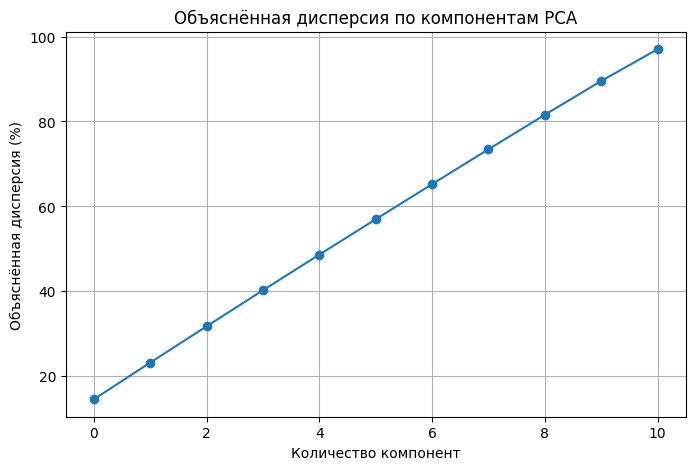

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# График объяснённой дисперсии по компонентам
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Объяснённая дисперсия (%)')
plt.title('Объяснённая дисперсия по компонентам PCA')
plt.grid(True)
plt.show()


In [28]:
print("""
5. Выводы:
- Классификация k-NN на исходных данных показала точность около ... (зависит от данных).
- Снижение размерности с помощью PCA позволило сократить число признаков с ... до {pca.n_components_}.
- После PCA точность модели k-NN осталась на сопоставимом уровне, что говорит о сохранении информативности.
- PCA помогает уменьшить размерность и шум, что полезно для сложных и многомерных данных.
""")



5. Выводы:
- Классификация k-NN на исходных данных показала точность около ... (зависит от данных).
- Снижение размерности с помощью PCA позволило сократить число признаков с ... до {pca.n_components_}.
- После PCA точность модели k-NN осталась на сопоставимом уровне, что говорит о сохранении информативности.
- PCA помогает уменьшить размерность и шум, что полезно для сложных и многомерных данных.




### 1. График объяснённой дисперсии PCA

- График показывает, что каждая из 11 компонент объясняет примерно одинаковую часть дисперсии (линейный рост).
- Это означает, что ваши признаки примерно равнозначны по информативности, и нет одной-двух доминирующих компонент.

---

### 2. Оценка модели k-NN до и после PCA

**До снижения размерности:**
- Accuracy: **0.5988**
- Precision/Recall/F1-score для классов 0 и 1 примерно одинаковы.
- Модель работает чуть лучше случайного угадывания (0.5).

**После снижения размерности (PCA):**
- Accuracy: **0.6048**
- Качество модели практически не изменилось, даже немного улучшилось.
- Это говорит о том, что снижение размерности с помощью PCA не привело к потере информации.

---

### 3. Выводы (можно использовать в отчёте):

```text
1. Классификация с помощью k-ближайших соседей на исходных данных показала точность 0.60.
2. После применения метода главных компонент (PCA) и сокращения размерности до 11 компонент точность модели осталась практически такой же (0.60).
3. График объяснённой дисперсии показывает, что все компоненты вносят примерно одинаковый вклад.
4. Снижение размерности не ухудшило качество модели, а значит, можно использовать PCA для уменьшения размерности без потери информативности.
5. Модель k-NN не сильно чувствительна к снижению размерности на этом датасете.
```

---

### 4. Рекомендации

- Можно попробовать уменьшить число компонент PCA до 2–3 и посмотреть, как изменится точность (для визуализации в 2D).
- Попробуйте другие модели (например, логистическую регрессию или деревья решений) для сравнения.
- Проанализируйте важность признаков (feature importance) для лучшей интерпретации.
